- Target is one of the world’s most recognized brands and one of America’s leading retailers. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

- This business case has information of 100k orders from 2016 to 2018 made at Target in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

Data is available in 8 csv files:

1. customers.csv

2. geolocation.csv

3. order_items.csv

4. payments.csv

5. reviews.csv

6. orders.csv

7. products.csv

8. sellers.csv

#### Each feature or columns of different CSV files are described below:

##### The customers.csv contain following features:

- customer_id :	Id of the consumer who made the purchase.
- customer_unique_id	:Unique Id of the consumer.
- customer_zip_code_prefix : Zip Code of the location of the - consumer.
- customer_city :	Name of the City from where order is made.
- customer_state :State Code from where order is made(Ex- sao paulo-SP).

##### The sellers.csv contains following features:


- seller_id : 	Unique Id of the seller registered
- seller_zip_code_prefix :	Zip Code of the location of the seller.
- seller_city	 : Name of the City of the seller.
- seller_state	: State Code (Ex- sao paulo-SP)


##### The order_items.csv contain following features:

- order_id:	A unique id of order made by the consumers.
- order_item_id:	A Unique id given to each item ordered in the order.
- product_id:	A unique id given to each product available on the site.
- seller_id:	Unique Id of the seller registered in Target.
- shipping_limit_date:	The date before which shipping of the ordered product must be completed.
- price:	Actual price of the products ordered .
- freight_value:	Price rate at which a product is delivered from one point to another.

#####  The geolocations.csv contain following features:

- geolocation_zip_code_prefix:	first 5 digits of zip code
- geolocation_lat:	latitude
- geolocation_lng:	longitude
- geolocation_city:	city name
- geolocation_state:	state

##### The payments.csv contain following features:

- order_id:	A unique id of order made by the consumers.
- payment_sequential:	sequences of the payments made in case of EMI.
- payment_type:	mode of payment used.(Ex-Credit Card)
- payment_installments:	number of installments in case of EMI purchase.
- payment_value:	Total amount paid for the purchase order.

##### The orders.csv contain following features:

- order_id:	A unique id of order made by the consumers.
- customer_id	:Id of the consumer who made the purchase.
- order_status:	status of the order made i.e delivered, shipped etc.
- order_purchase_timestamp:	Timestamp of the purchase.
- order_delivered_carrier_date	:delivery date at which carrier made the delivery.
- order_delivered_customer_date:	date at which customer got the product.
- order_estimated_delivery_date:	estimated delivery date of the products.

##### The reviews.csv contain following features:

- review_id:	Id of the review given on the product ordered by the order id.
- order_id:	A unique id of order made by the consumers.
- review_score	:review score given by the customer for each order on the scale of 1–5.
- review_comment_title:	Title of the review
- review_comment_message:	Review comments posted by the consumer for each order.
- review_creation_date	:Timestamp of the review when it is created.
- review_answer_timestamp:	Timestamp of the review answered.

##### The products.csv contain following features:

- product_id:	A unique identifier for the proposed project.
- product_category_name:	Name of the product category
- product_name_lenght:	length of the string which specifies the name given to the products ordered.
- product_description_lenght:	length of the description written for each product ordered on the site.
- product_photos_qty	:Number of photos of each product ordered available on the shopping portal.
- product_weight_g	:Weight of the products ordered in grams.
- product_length_cm:	Length of the products ordered in centimeters.
- product_height_cm:	Height of the products ordered in centimeters.
- product_width_cm:	width of the product ordered in centimeters.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'targetbrazilsalesanalysis'

In [ ]:
from google.cloud import bigquery

In [ ]:
client = bigquery.Client(project = project_id)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

Analyzing Customer Table


In [ ]:
client.query("""

SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    targetbrazilsalesanalysis.Customers.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'customers';
    
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type,rounding_mode
0,Customers,customers,customer_id,YES,STRING,None
1,Customers,customers,customer_unique_id,YES,STRING,None
2,Customers,customers,customer_zip_code_prefix,YES,INT64,None
3,Customers,customers,customer_city,YES,STRING,None
4,Customers,customers,customer_state,YES,STRING,None


Total Number of Customers data we have: 99441


In [ ]:
client.query(
    """
    SELECT COUNT(distinct(customer_id)) from Customers.customers;
    """
    ).to_dataframe()["f0_"][0]

99441

In [ ]:
client.query(
"""
select count(distinct(customer_unique_id)) from `Customers.customers` ;
"""
).to_dataframe()["f0_"][0]

96096

14994 unique zip code prefix

In [ ]:
client.query(
"""

select count(distinct(customer_zip_code_prefix)) from `Customers.customers` ;


""").to_dataframe()["f0_"][0]

14994

That means Target has customers from 14994 different locations

In [ ]:
client.query(
"""

select count(distinct(customer_city)) from `Customers.customers` ;


""").to_dataframe()["f0_"][0]

4119

In [ ]:
client.query(
"""

select count(distinct(customer_state)) from `Customers.customers` ;


""").to_dataframe()["f0_"][0]

27

Customers are from different 4119 cities and 27 states from Brazil

Getting Data on Brazil states


In [ ]:
brazil = pd.read_html("https://brazil-help.com/brazilian_states.htm")[2]
new_header = brazil.iloc[1] #grab the first row for the header
brazil = brazil[1:] #take the data less the header row
brazil.columns = new_header #set the header row as the df header
brazil.drop(1,axis = 0,inplace=True)
brazil.reset_index(inplace=True)
brazil.drop(["index"],axis = 1,inplace=True)
brazil.columns = ['customer_state', 'State', 'Capitol City', 'Region',
       'Size (in km²)', 'Population (2007 estimate)', '% Pop. Urban/Rural',
       'Number of Municipal Districts', 'Per Capita GNP in Reais (R$)',
       'Life Expectancy (2007 projection)']
brazil.drop(["Size (in km²)","Life Expectancy (2007 projection)"
             ,"Number of Municipal Districts",
            "Population (2007 estimate)",
            "% Pop. Urban/Rural",
            "Per Capita GNP in Reais (R$)",
            "Capitol City"],axis = 1,inplace=True)

In [ ]:
brazil

,customer_state,State,Region
0,AC,Acre,North
1,AL,Alagoas,Northeast
2,AP,Amapá,North
3,AM,Amazonas,North
4,BA,Bahia,Northeast
5,CE,Ceará,Northeast
6,DF,Distrito Federal,Center West
7,ES,Espírito Santo,Southeast
8,GO,Goiás,Center West
9,MA,Maranhão,Northeast


In [ ]:
df = client.query(
"""

select 
customer_state,
COUNT(customer_id) as Number_of_customers

from 
    `Customers.customers`
GROUP BY
    customer_state
ORDER BY 
    Number_of_customers
;


""").to_dataframe()
df.merge(brazil,on="customer_state")

,customer_state,Number_of_customers,State,Region
0,RR,46,Roraima,North
1,AP,68,Amapá,North
2,AC,81,Acre,North
3,AM,148,Amazonas,North
4,RO,253,Rondônia,North
5,TO,280,Tocantins,North
6,SE,350,Sergipe,Northeast
7,AL,413,Alagoas,Northeast
8,RN,485,Rio Grande do Norte,Northeast
9,PI,495,Piauí,Northeast


In [ ]:
((df.merge(brazil, on = "customer_state").groupby("Region")['Number_of_customers'].sum())/99441)*100

Region
Center West     5.814503
North           1.861405
Northeast       9.446808
South          14.227532
Southeast      68.649752
Name: Number_of_customers, dtype: Float64

Total 99441 customers are there in the given data

68% of customers are from SouthEast Brazil

14% are from South Brazil

And Rest are from other regions of Brazil

Analyzing Sellers Data:

In [ ]:
client.query("""

SELECT
   * EXCEPT(is_generated, generation_expression, is_stored, is_updatable, is_hidden, is_system_defined, is_partitioning_column, clustering_ordinal_position, collation_name, column_default, ordinal_position, table_catalog)
  FROM 
     targetbrazilsalesanalysis.Customers.INFORMATION_SCHEMA.COLUMNS
  WHERE
     table_name = "sellers";

""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type,rounding_mode
0,Customers,sellers,seller_id,YES,STRING,None
1,Customers,sellers,seller_zip_code_prefix,YES,INT64,None
2,Customers,sellers,seller_city,YES,STRING,None
3,Customers,sellers,seller_state,YES,STRING,None


In [ ]:
client.query(
"""

SELECT  
    COUNT(DISTINCT(seller_id)) 
FROM 
    `Customers.sellers` ;


""").to_dataframe()["f0_"][0]

3095

In [ ]:
client.query(
"""

SELECT  
    COUNT(DISTINCT(seller_zip_code_prefix)) 
FROM 
    `Customers.sellers` ;


""").to_dataframe()["f0_"][0]

2246

In [ ]:
client.query(
"""

SELECT  
    COUNT(DISTINCT(seller_city)) 
FROM 
    `Customers.sellers` ;


""").to_dataframe()["f0_"][0]

611

In [ ]:
client.query(
"""

SELECT  
    COUNT(DISTINCT(seller_state)) 
FROM 
    `Customers.sellers` ;


""").to_dataframe()["f0_"][0]

23

There are 3095 seller's data present here.

These sellers are from 2246 locations, 611 cities and 23 different states in Brazil.

In [ ]:
client.query(
"""

select 
    seller_state,
    string_field_2 as seller_state_,
    count(seller_id) as  number_of_sellers

from `targetbrazilsalesanalysis.Customers.brazil_data` as bd
join `targetbrazilsalesanalysis.Customers.sellers` as s 
on bd.string_field_1 = s.seller_state

group by seller_state,string_field_2
order by number_of_sellers desc
;

""").to_dataframe()

,seller_state,seller_state_,number_of_sellers


Analyzing Products

In [ ]:
client.query("""

SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    targetbrazilsalesanalysis.Customers.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'products';
    
    
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type,rounding_mode
0,Customers,products,product_id,YES,STRING,None
1,Customers,products,product_category_name,YES,STRING,None
2,Customers,products,product_name_lenght,YES,INT64,None
3,Customers,products,product_description_lenght,YES,INT64,None
4,Customers,products,product_photos_qty,YES,INT64,None
5,Customers,products,product_weight_g,YES,INT64,None
6,Customers,products,product_length_cm,YES,INT64,None
7,Customers,products,product_height_cm,YES,INT64,None
8,Customers,products,product_width_cm,YES,INT64,None


Number of Unique Products available in Target

In [ ]:
client.query(
"""
SELECT COUNT(product_id)
FROM `Customers.products`;
""").to_dataframe()["f0_"][0]

32951

Product Category Name

In [ ]:
client.query(
"""
SELECT COUNT(DISTINCT(product_category_name))
FROM `Customers.products`;
""").to_dataframe()["f0_"][0]

73

In [ ]:
client.query(
"""

SELECT  
    COUNT(product_id) 
FROM 
    `Customers.products` ;


""").to_dataframe()["f0_"][0]

32951

There are Total 32951 different Products available in Target

And there are 73 different Product categories

In [ ]:
# product_category_name
client.query(
"""

SELECT  
    product_category_name,
    
    COUNT(DISTINCT(product_id)) AS Number_of_product_per_category 
FROM 
    `Customers.products`
GROUP BY product_category_name
ORDER BY
    COUNT(DISTINCT(product_id)) desc
;


""").to_dataframe()

,product_category_name,Number_of_product_per_category
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
...,...,...
69,fashion_roupa_infanto_juvenil,5
70,casa_conforto_2,5
71,pc_gamer,3
72,seguros_e_servicos,2


Order Items


In [ ]:
client.query("""

SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    targetbrazilsalesanalysis.Customers.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'orderitems';
    
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type,rounding_mode
0,Customers,orderitems,order_id,YES,STRING,None
1,Customers,orderitems,order_item_id,YES,INT64,None
2,Customers,orderitems,product_id,YES,STRING,None
3,Customers,orderitems,seller_id,YES,STRING,None
4,Customers,orderitems,shipping_limit_date,YES,TIMESTAMP,None
5,Customers,orderitems,price,YES,FLOAT64,None
6,Customers,orderitems,freight_value,YES,FLOAT64,None


CREATED A VIEW HAVING ORDER QUANTITY AS PER ORDER_ITEM_ID FROM ORIGINAL ORDER_ITEM TABLEM

ADDED A COLUMN CALLED TOTAL_AMT_TO_PAY
WHICH IS

total_amt_to_pay = ( price * quantity ) + freight_value

In [ ]:
CREATE VIEW `Customers.orderitems_SALES` AS

SELECT *,
ROUND(((x.price + x.freight_value) * x.quantity),2) as Total_Amt_to_Pay
FROM
(
SELECT  
    DISTINCT
    order_id,
    product_id,
    seller_id,
    shipping_limit_date,
    price,
    freight_value,
    COUNT(product_id) OVER (PARTITION BY order_id, product_id) AS quantity
FROM 
    `Customers.orderitems`

) as x
;

Analyzing Orders Table

In [ ]:
client.query("""

SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    targetbrazilsalesanalysis.Customers.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'orders';
    
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type,rounding_mode
0,Customers,orders,order_id,YES,STRING,None
1,Customers,orders,customer_id,YES,STRING,None
2,Customers,orders,order_status,YES,STRING,None
3,Customers,orders,order_purchase_timestamp,YES,TIMESTAMP,None
4,Customers,orders,order_approved_at,YES,TIMESTAMP,None
5,Customers,orders,order_delivered_carrier_date,YES,TIMESTAMP,None
6,Customers,orders,order_delivered_customer_date,YES,TIMESTAMP,None
7,Customers,orders,order_estimated_delivery_date,YES,TIMESTAMP,None


Time period for which Data is given

In [ ]:
client.query(
"""
SELECT
DATE_DIFF(MAX(DATE(order_delivered_customer_date)),MIN(DATE(order_purchase_timestamp)),month) AS time_period_in_months
FROM Customers.orders;
"""
).to_dataframe()

,time_period_in_months
0,25


NUmber of order as per order status presented in data


In [ ]:
client.query(
"""
SELECT
order_status,
COUNT(1) AS Number_of_Orders
FROM `Customers.orders`
GROUP BY order_status
"""
).to_dataframe()

,order_status,Number_of_Orders
0,created,5
1,shipped,1107
2,approved,2
3,canceled,625
4,invoiced,314
5,delivered,96478
6,processing,301
7,unavailable,609


1. Is there a growing trend on e-Commerce in Brazil ? 
How can we describe a complete scenario ?
Can we see some seasonality with peaks at specific months ?

Revenue Per Year

In [ ]:
df = client.query(
"""
SELECT
EXTRACT(YEAR FROM order_purchase_timestamp) as _year,
ROUND(SUM(Total_Amt_to_Pay), 2) AS revenue,
COUNT(o.order_id) AS number_of_Orders
FROM
`targetbrazilsalesanalysis.Customers.orders` as o
JOIN 
`targetbrazilsalesanalysis.Customers.order_items_SALES` AS ois
ON o.order_id = ois.order_id
GROUP BY _year
ORDER BY _year;
"""
).to_dataframe()

 year	revenue	  number_of_orders

	2016  57183.21   332

	2017  7142672.43 46314

	2018  8643697.60 55779

compare to 2017 , revenue has increased in 2018 by 21%.

In [ ]:
df = client.query("""

SELECT
x.month,
AVG(x.num_of_orders) AS avgerage_orders_per_month
from
(

SELECT
    extract(year from order_purchase_timestamp) as year,
    extract(month from order_purchase_timestamp) as month,
    count(order_id) as num_of_orders
from 
    `targetbrazilsalesanalysis.Customers.orders`
group by 
    year,month
order by
    year,month
) as x
group by x.month
order by x.month
;
""").to_dataframe()

In [ ]:
df

,month,avgerage_orders_per_month
0,1,4034.5
1,2,4254.0
2,3,4946.5
3,4,4671.5
4,5,5286.5
5,6,4706.0
6,7,5159.0
7,8,5421.5
8,9,1435.0
9,10,1653.0


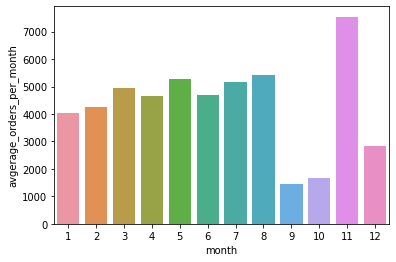

In [ ]:
sns.barplot(x = df["month"],
           y = df["avgerage_orders_per_month"])

Average number of order are higher during November month.

September and october month average orders are comparatively low.

May, July and august have higher average orders compare to other months.

Number of Orders Per Week Trend

In [ ]:
df = client.query("""

SELECT
    extract(year from order_purchase_timestamp) as year,
    extract(month from order_purchase_timestamp) as month,
    extract(week from order_purchase_timestamp) as week,
    count(order_id) as num_of_orders
from 
    `targetbrazilsalesanalysis.Customers.orders`
group by 
    year,month,week
order by
    year,month,week

;
""").to_dataframe()

In [ ]:
df

,year,month,week,num_of_orders
0,2016,9,36,2
1,2016,9,37,2
2,2016,10,40,258
3,2016,10,41,65
4,2016,10,42,1
...,...,...,...,...
110,2018,9,36,4
111,2018,9,37,2
112,2018,9,38,3
113,2018,10,39,2


In [ ]:
df["year"] = df["year"].astype("object")
df["month"] = df["month"].astype("object")

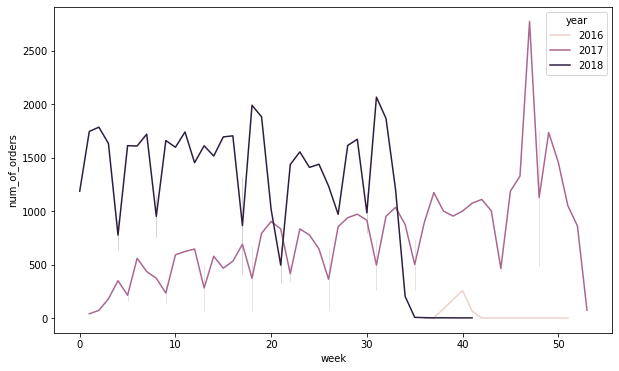

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data  = df,
            x = "week",
            y = "num_of_orders", hue = "year"
            )

Growing Number of Orders Trend as per Number of Orders

In [ ]:
df = client.query("""

select
    *,
    round(avg(num_of_orders) over (order by year,month,week
              rows between 2 preceding and 2 following),0) as rolling_avg_order
from
    (
    SELECT
        extract(year from order_purchase_timestamp) as year,
        extract(month from order_purchase_timestamp) as month,
        extract(week from order_purchase_timestamp) as week,
        count(order_id) as num_of_orders
    from 
        `targetbrazilsalesanalysis.Customers.orders`
    group by year,month,week
    order by year,month,week
    ) as x
;

""").to_dataframe()

In [ ]:
df["time"] = df["year"].astype("str")+"_"+df["month"].astype("str")+"_"+df["week"].astype("str")
df.reset_index(inplace=True)


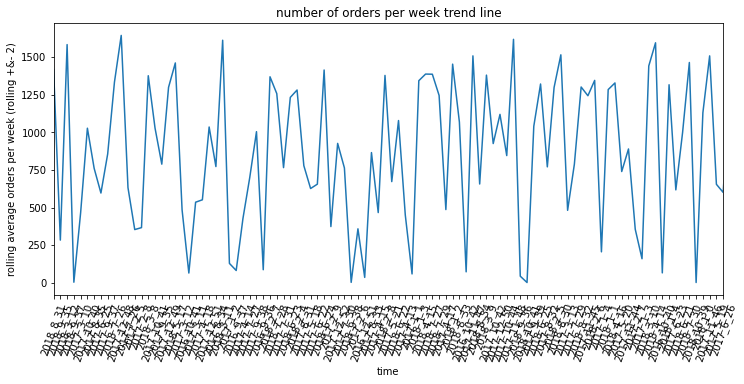

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x = df["time"],
           y = df["rolling_avg_order"])
plt.title("number of orders per week trend line")
plt.xlabel("time")
plt.ylabel("rolling average orders per week (rolling +&- 2)")
plt.xlim(1,100)
plt.xticks(rotation = 70)
plt.show()

there is a increasing trend in orders , trend sustains during 2018.
there a slight fall we can observe during october 2017 following with a great hike in november month and again a fall in end of december 2017 and january 2018.

Revenue Trend for given time duration

In [ ]:
df = client.query("""

select
year,
month,
week,
revenue,
avg(revenue) over (order by year,month,week
                        rows between 4 preceding and 2 following) rolling_avg_revenue,
avg(Number_of_orders) over (order by year,month,week
                        rows between 4 preceding and 2 following) rolling_avg_orders                        
                                        
FROM
(
SELECT
    EXTRACT(YEAR FROM order_purchase_timestamp) as year,
    EXTRACT(MONTH FROM order_purchase_timestamp) as month,
    EXTRACT(week from order_purchase_timestamp) as week,
    ROUND(SUM(op.payment_value),2) AS revenue,
    count(o.order_id) as Number_of_orders
from 
    `targetbrazilsalesanalysis.Customers.orders` as o
join 
    `targetbrazilsalesanalysis.Customers.orderpayments` as op
on o.order_id = op.order_id
group by year,month,week
order by year, month, week
);
""").to_dataframe()

In [ ]:
df

,year,month,week,revenue,rolling_avg_revenue,rolling_avg_orders
0,2017,4,18,9437.00,90168.938571,580.857143
1,2017,10,44,71244.76,151608.758571,944.000000
2,2018,3,11,277672.64,230850.810000,1479.142857
3,2017,6,23,127764.65,109514.142857,734.571429
4,2017,2,7,78615.45,55335.327143,346.142857
...,...,...,...,...,...,...
110,2017,6,24,120145.26,104297.741429,691.142857
111,2017,12,53,10190.93,179201.102857,1206.857143
112,2018,1,2,270341.37,177635.568571,1220.857143
113,2017,8,35,138430.55,127800.922857,825.285714


In [ ]:
df["time"] = df["year"].astype("str")+"_"+df["month"].astype("str")+"_"+df["week"].astype("str")
df.reset_index(inplace=True)

In [ ]:
df["standardized_rolling_avg_revenue"]=(df["rolling_avg_revenue"]-df["rolling_avg_revenue"].mean())/df["rolling_avg_revenue"].std()

In [ ]:
df["standardized_rolling_avg_orders"]=(df["rolling_avg_orders"]-df["rolling_avg_orders"].mean())/df["rolling_avg_orders"].std()

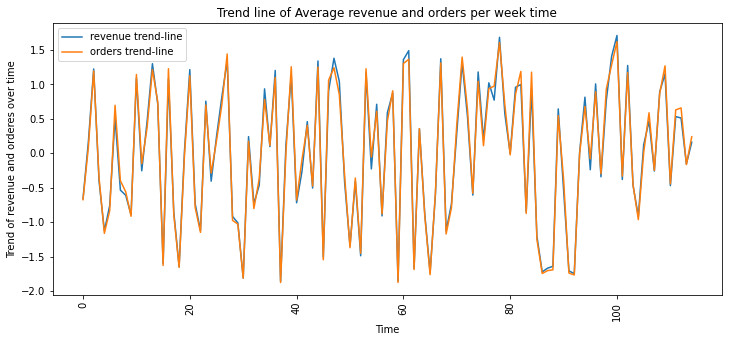

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x = df["index"],
           y = df["standardized_rolling_avg_revenue"])
sns.lineplot(x = df["index"],
           y = df["standardized_rolling_avg_orders"])
plt.xticks(rotation = 90)
plt.xlabel("Time")
plt.ylabel("Trend of revenue and orderes over time")
plt.title("Trend line of Average revenue and orders per week time")
plt.legend(["revenue trend-line","orders trend-line"])

plt.show()


In [ ]:
df = client.query("""

select

FORMAT_TIMESTAMP("%a", order_purchase_timestamp) as day,
count(order_id) as number_or_orders 
from
Customers.orders
group by day


;

""").to_dataframe()

In [ ]:
df

,day,number_or_orders
0,Sat,10887
1,Tue,15963
2,Fri,14122
3,Mon,16196
4,Thu,14761
5,Wed,15552
6,Sun,11960


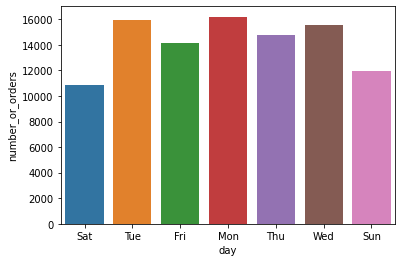

In [ ]:
sns.barplot(x = df["day"],
           y = df["number_or_orders"])

Tuesday, monday and wednesdays have relatively higher number of orders.

2. What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

In [ ]:
orders_per_hour = client.query("""

SELECT
    X.HOUR,
    COUNT(X.order_id) as number_of_orders
FROM
            (
            SELECT
            order_id,
            EXTRACT (HOUR FROM order_purchase_timestamp) AS HOUR
            FROM
            `Customers.orders`
            )
            AS X
GROUP BY 
    X.HOUR

;

""").to_dataframe()

In [ ]:
orders_per_hour

,HOUR,number_of_orders
0,11,6578
1,1,1170
2,17,6150
3,13,6518
4,12,5995
5,18,5769
6,10,6177
7,21,6217
8,15,6454
9,22,5816


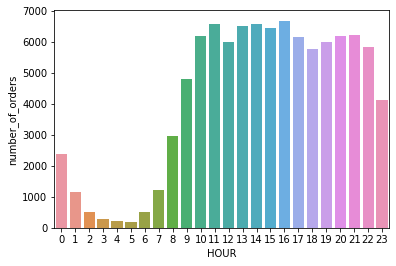

In [ ]:
sns.barplot(x = orders_per_hour["HOUR"],
           y = orders_per_hour["number_of_orders"])

In [ ]:
client.query("""

SELECT
    X.HOUR,
    COUNT(X.order_id) as number_of_orders,
    CASE
        WHEN X.HOUR BETWEEN 5 AND 7 THEN 'Dawn'
        WHEN X.HOUR BETWEEN 8 AND 11 THEN 'Morning'
        WHEN X.hour BETWEEN 12 AND 17 THEN 'Afternoon'
        WHEN X.hour BETWEEN 18 and 21 THEN 'Evening'
        ELSE 'night'
        END AS time
FROM
            (
            SELECT
            order_id,
            EXTRACT (HOUR FROM order_purchase_timestamp) AS HOUR
            FROM
            `Customers.orders`
            )
            AS X
GROUP BY 
    X.HOUR

;

""").to_dataframe()

,HOUR,number_of_orders,time
0,11,6578,Morning
1,1,1170,night
2,17,6150,Afternoon
3,13,6518,Afternoon
4,12,5995,Afternoon
5,18,5769,Evening
6,10,6177,Morning
7,21,6217,Evening
8,15,6454,Afternoon
9,22,5816,night


In [ ]:
df = client.query("""
WITH order_time 
AS
(
SELECT
    X.HOUR,
    COUNT(X.order_id) as number_of_orders,
    CASE
        WHEN X.HOUR BETWEEN 5 AND 7 THEN 'Dawn'
        WHEN X.HOUR BETWEEN 8 AND 11 THEN 'Morning'
        WHEN X.hour BETWEEN 12 AND 17 THEN 'Afternoon'
        WHEN X.hour BETWEEN 18 and 21 THEN 'Evening'
        ELSE 'night'
        END AS time
FROM
            (
            SELECT
            order_id,
            EXTRACT (HOUR FROM order_purchase_timestamp) AS HOUR
            FROM
            `Customers.orders`
            )
            AS X
GROUP BY 
    X.HOUR
)

SELECT 
    time,
    SUM(number_of_orders) AS total_order
FROM
    order_time
GROUP BY time
ORDER BY total_order DESC

;

""").to_dataframe()

In [ ]:
df

,time,total_order
0,Afternoon,38361
1,Evening,24161
2,Morning,20507
3,night,14491
4,Dawn,1921


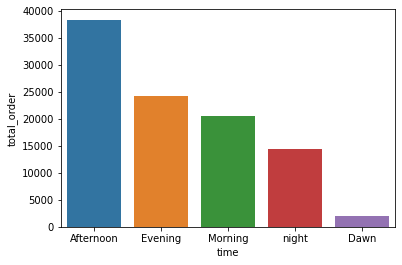

In [ ]:
sns.barplot(x = df["time"],
           y = df["total_order"])

Customers are purchasing during morning 8 am to evening 11 pm

Afternoon Orders are very high 

Night orders are lowest

NUmber of Orders per state


In [ ]:
df = client.query("""

select 
    c.customer_state,
    count(o.order_id) as number_of_orders_per_state

from 
    `targetbrazilsalesanalysis.Customers.orders` as o
    join `targetbrazilsalesanalysis.Customers.customers` as c
    on o.customer_id= c.customer_id
group by
    c.customer_state
order by number_of_orders_per_state desc

;
""").to_dataframe()
df = df.merge(brazil,on="customer_state")

In [ ]:
df

,customer_state,number_of_orders_per_state,State,Region
0,SP,41746,São Paulo,Southeast
1,RJ,12852,Rio de Janeiro,Southeast
2,MG,11635,Minas Gerais,Southeast
3,RS,5466,Rio Grande do Sul,South
4,PR,5045,Paraná,South
5,SC,3637,Santa Catarina,South
6,BA,3380,Bahia,Northeast
7,DF,2140,Distrito Federal,Center West
8,ES,2033,Espírito Santo,Southeast
9,GO,2020,Goiás,Center West


In [ ]:
(df.groupby("Region")["number_of_orders_per_state"].sum()/df["number_of_orders_per_state"].sum())*100

Region
Center West     5.814503
North           1.861405
Northeast       9.446808
South          14.227532
Southeast      68.649752
Name: number_of_orders_per_state, dtype: Float64

In [ ]:
df = client.query("""

select 
    c.customer_state,
    sum(op.payment_value) as revenue_per_state,
    avg(op.payment_value) as avg_sale_per_state
from 
    `targetbrazilsalesanalysis.Customers.orders` as o
    join `targetbrazilsalesanalysis.Customers.customers` as c
    on o.customer_id= c.customer_id
    join `targetbrazilsalesanalysis.Customers.orderpayments` as op
    on o.order_id = op.order_id
group by
    c.customer_state
order by revenue_per_state desc

;
""").to_dataframe()
df = df.merge(brazil,on="customer_state")

In [ ]:
df

,customer_state,revenue_per_state,avg_sale_per_state,State,Region
0,SP,5998226.96,137.504630,São Paulo,Southeast
1,RJ,2144379.69,158.525888,Rio de Janeiro,Southeast
2,MG,1872257.26,154.706434,Minas Gerais,Southeast
3,RS,890898.54,157.180406,Rio Grande do Sul,South
4,PR,811156.38,154.153626,Paraná,South
5,SC,623086.43,165.979337,Santa Catarina,South
6,BA,616645.82,170.816017,Bahia,Northeast
7,DF,355141.08,161.134791,Distrito Federal,Center West
8,GO,350092.31,165.763404,Goiás,Center West
9,ES,325967.55,154.706953,Espírito Santo,Southeast


In [ ]:
(df.groupby("Region")["revenue_per_state"].sum()/df["revenue_per_state"].sum())*100

Region
Center West     6.432668
North           2.589954
Northeast      11.858921
South          14.524080
Southeast      64.594379
Name: revenue_per_state, dtype: float64

São Paulo ,Rio de Janeiro , Minas Gerais ,Rio Grande do Sul and Paraná are top 5 highest orders states and also generating highest revenue.

more than 80% of orders are coming from south, southeast and nothest Brazil.
90% of the revenue is coming from south, southeast and nothest Brazil .

Top 20 Cities where highest number of orders coming from

In [ ]:
client.query("""

SELECT 
    c.customer_city,
    count(distinct(o.order_id)) number_of_customers,
    sum(op.payment_value) as revenue
FROM
    `targetbrazilsalesanalysis.Customers.customers` as c
    left join  `targetbrazilsalesanalysis.Customers.orders` as o
        on c.customer_id = o.customer_id
    left join  `targetbrazilsalesanalysis.Customers.orderpayments` as op
        on o.order_id = op.order_id

group by 
    c.customer_city
order by 
    number_of_customers desc,
    revenue desc
limit 20
;
""").to_dataframe()

,customer_city,number_of_customers,revenue
0,sao paulo,15540,2203373.09
1,rio de janeiro,6882,1161927.36
2,belo horizonte,2773,421765.12
3,brasilia,2131,354216.78
4,curitiba,1521,247392.48
5,campinas,1444,216248.43
6,porto alegre,1379,224731.42
7,salvador,1245,218071.50
8,guarulhos,1189,165121.99
9,sao bernardo do campo,938,120434.84


Product Analysis

Top Selling product categories and How Many orders per placed per category

In [ ]:
client.query(
"""
SELECT
    product_category_name,
    count(distinct(op.product_id)) as Number_of_products,
    count(distinct(op.order_id)) as Number_of_orders,
    sum(payment_value) as revenue
FROM
    `Customers.orders` as o
    join `Customers.orderpayments` as op
    on o.order_id = op.order_id
    join `Customers.products`  as p
    on p.product_id = o.product_id ###unable to figure out
GROUP BY
    p.product_category_name
ORDER BY 
    revenue desc,Number_of_orders desc
LIMIT 20
;
""").to_dataframe()

health and beauty, Watches present, bed table bath, sport leisure, computer accessories, Furniture Decoration, housewares, Automotive are some of the top selling product categories.
health and beauty products are top selling having highest orders.
PCs and Musical Instruments category have relatively less number of products , but contributes in a high revenue.

Average price per product category along with average fright value :

In [ ]:
client.query("""
select 
    p.product_category,
    min(ois.price) as min_price_product,
    max(ois.price) as max_price_product,
    avg(ois.price) as avg_price,
    avg(ois.freight_value) as avg_fright_value
    
from target.orders as o
    join target.order_items_SALES as ois
    on o.order_id = ois.order_id
    join target.products as p
    on ois.product_id = p.product_id
group by
    p.product_category
order by avg_price desc,avg_fright_value desc
limit 15

;
""").to_dataframe()

PCs,house pastals oven and cafe,agro industry and commerce,musical instruments,Kitchen portable and food coach are having highest average product price categories.

Analysis delivery time

Creating columns like, what is the time taken to complete delivery from purchase time.

What the expected time for delivery ?

How many days exceeded from expected delivery time ?

Is the delivery was on time ?

In [ ]:
client.query("""


SELECT
*,
CASE WHEN days_exceeded_from_expected_delivery > 0 THEN 'delayed'
    ELSE 'on_time_delivery'
  END AS is_on_time
FROM
(
SELECT 
    order_id,
    date_diff(order_delivered_customer_date,order_estimated_delivery_date,day) as days_exceeded_from_expected_delivery,
    date_diff(order_delivered_customer_date,order_purchase_timestamp,day) as days_taken_to_delivery,
    date_diff(order_estimated_delivery_date,order_purchase_timestamp,day) as estimated_time_to_delivery

FROM
    Customers.orders
WHERE 
    order_status = 'delivered'
)
;




""").to_dataframe()

,order_id,days_exceeded_from_expected_delivery,days_taken_to_delivery,estimated_time_to_delivery,is_on_time
0,635c894d068ac37e6e03dc54eccb6189,-1,30,32,on_time_delivery
1,3b97562c3aee8bdedcb5c2e45a50d5e1,0,32,33,on_time_delivery
2,68f47f50f04c4cb6774570cfde3a9aa7,-1,29,31,on_time_delivery
3,276e9ec344d3bf029ff83a161c6b3ce9,4,43,39,delayed
4,54e1a3c2b97fb0809da548a59f64c813,4,40,36,delayed
...,...,...,...,...,...
96473,ebca4856d6b3b849437fe99d11633d25,6,28,22,delayed
96474,a6f521d5e68e95961ac13d448a960fd7,-5,28,34,on_time_delivery
96475,f41397c4cf4c8a67f5f540472acbfe4f,5,28,22,delayed
96476,b674e463ea07d8a8fac9951be50283f1,10,28,18,delayed


In [ ]:
client.query("""

SELECT
    DISTINCT
    x.delivery_on_time,
    COUNT(*) OVER (PARTITION BY x.delivery_on_time) 
FROM
        (
        SELECT
        *,

        CASE
            WHEN order_delivered_customer_date IS NULL  THEN 'not_yet_delivered'
            WHEN (order_delivered_customer_date < order_estimated_delivery_date) THEN 'on_time_delivery'
            ELSE 'delayed'
            END AS delivery_on_time

        FROM
        Customers.orders
        ) AS x


;
""").to_dataframe()

,delivery_on_time,f0_
0,delayed,7827
1,not_yet_delivered,2965
2,on_time_delivery,88649


In [ ]:
dtime = client.query("""


select 
    order_id,
    order_status,
    date_diff(order_approved_at,order_purchase_timestamp,day) as approval_time,
    date_diff(order_delivered_carrier_date,order_approved_at,day) as time_taken_to_start_delivery_by_carrier,
    date_diff(order_delivered_customer_date,order_purchase_timestamp,day) as time_taken_for_delivery,
    date_diff(order_estimated_delivery_date,order_purchase_timestamp,day) as estimated_time_for_delivery,
    date_diff(order_estimated_delivery_date,order_delivered_customer_date,day) as diff_estimated_delivery
from
    Customers.orders;
    """).to_dataframe()

In [ ]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   order_id                                 99441 non-null  object
 1   order_status                             99441 non-null  object
 2   approval_time                            99281 non-null  Int64 
 3   time_taken_to_start_delivery_by_carrier  97644 non-null  Int64 
 4   time_taken_for_delivery                  96476 non-null  Int64 
 5   estimated_time_for_delivery              99441 non-null  Int64 
 6   diff_estimated_delivery                  96476 non-null  Int64 
dtypes: Int64(5), object(2)
memory usage: 5.8+ MB


In [ ]:
dtime["approval_time"].mean(),dtime["approval_time"].median() # in days

(0.2697998610005943, 0.0)

In [ ]:
dtime["time_taken_to_start_delivery_by_carrier"].mean(),dtime["time_taken_to_start_delivery_by_carrier"].median() # in days

(2.315667117283192, 1.0)

In [ ]:
dtime["time_taken_for_delivery"].mean(),dtime["time_taken_for_delivery"].median()  # in days

(12.094085575687217, 10.0)

In [ ]:
dtime["estimated_time_for_delivery"].mean(),dtime["estimated_time_for_delivery"].median() # in days

(23.403958125923914, 23.0)

Distribution Of Delivery Time

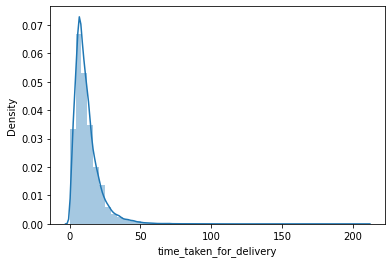

In [ ]:
sns.distplot(dtime["time_taken_for_delivery"].dropna())

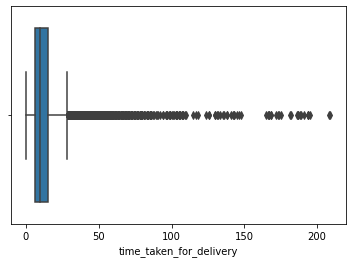

In [ ]:
sns.boxplot(dtime["time_taken_for_delivery"].dropna())

distibution of time difference between delivery time and estimated delivery time :

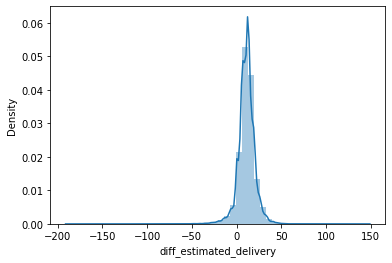

In [ ]:
sns.distplot(dtime["diff_estimated_delivery"].dropna())

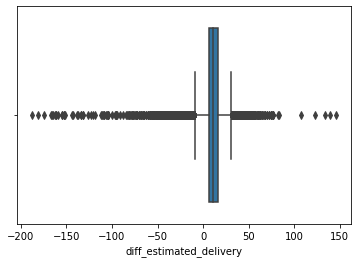

In [ ]:
sns.boxplot(dtime["diff_estimated_delivery"].dropna())

In [ ]:
state_delivery_time_freight_val = client.query("""


/*Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery*/

SELECT 
    c.customer_state,
    avg(date_diff(order_approved_at,order_purchase_timestamp,day)) as mean_of_approval_time,
    avg(date_diff(order_delivered_carrier_date,order_approved_at,day)) as mean_of_time_taken_to_start_delivery_by_carrier,
    avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,day)) as mean_of_time_taken_for_delivery,
    avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,day)) as mean_of_diff_estimated_delivery,
    avg(oi.freight_value) avg_fright_value
FROM
`targetbrazilsalesanalysis.Customers.orders` as o
JOIN
`targetbrazilsalesanalysis.Customers.customers` as c
on o.customer_id = c.customer_id
JOIN
`targetbrazilsalesanalysis.Customers.orderitems` as oi
on oi.order_id = o.order_id

group by 
c.customer_state
order by
mean_of_time_taken_for_delivery

;
    """).to_dataframe()

In [ ]:

state_delivery_time_freight_val.merge(brazil,how="inner",on="customer_state")

,customer_state,mean_of_approval_time,mean_of_time_taken_to_start_delivery_by_carrier,mean_of_time_taken_for_delivery,mean_of_diff_estimated_delivery,avg_fright_value,State,Region
0,SP,0.251960,2.306220,8.259609,10.265594,15.147275,São Paulo,Southeast
1,PR,0.295470,2.378165,11.480793,12.533900,20.531652,Paraná,South
2,MG,0.275103,2.356214,11.515522,12.397151,20.630167,Minas Gerais,Southeast
3,DF,0.285121,2.392288,12.501486,11.274735,21.041355,Distrito Federal,Center West
4,SC,0.296935,2.434067,14.520986,10.668863,21.470369,Santa Catarina,South
5,RJ,0.245541,2.502109,14.689382,11.144493,20.960924,Rio de Janeiro,Southeast
6,RS,0.323600,2.299627,14.708299,13.203000,21.735804,Rio Grande do Sul,South
7,GO,0.336477,2.086938,14.948177,11.372859,22.766815,Goiás,Center West
8,MS,0.262515,2.273956,15.107275,10.337855,23.374884,MatoGrosso do Sul,Center West
9,ES,0.285018,2.506684,15.192809,9.768539,22.058777,Espírito Santo,Southeast


In [ ]:
np.corrcoef(state_delivery_time_freight_val["mean_of_time_taken_for_delivery"],
           state_delivery_time_freight_val["avg_fright_value"])

array([[1.        , 0.78995771],
       [0.78995771, 1.        ]])

In [ ]:
delivery_time = client.query("""


SELECT 
    o.order_id,
    c.customer_state,
    (date_diff(order_approved_at,order_purchase_timestamp,day)) as approval_time,
    (date_diff(order_delivered_carrier_date,order_approved_at,day)) as time_taken_to_start_delivery_by_carrier,
    (date_diff(order_delivered_customer_date,order_purchase_timestamp,day)) as time_taken_for_delivery,
    (date_diff(order_estimated_delivery_date,order_purchase_timestamp,day)) as estimated_time_for_delivery,
    (date_diff(order_estimated_delivery_date,order_delivered_customer_date,day)) as diff_estimated_delivery
FROM
`targetbrazilsalesanalysis.Customers.orders` as o
JOIN
`targetbrazilsalesanalysis.Customers.customers` as c
on o.customer_id = c.customer_id
WHERE
    o.order_delivered_customer_date is not null and
    o.order_delivered_carrier_date is not null and
    o.order_approved_at is not null
ORDER BY 
  c.customer_state
  ;
    """).to_dataframe()

In [ ]:
delivery_time= delivery_time.merge(brazil,on="customer_state")

Calculating 95% confidence Interval of Delivery time for each states

In [ ]:
delivery_time

,order_id,customer_state,approval_time,time_taken_to_start_delivery_by_carrier,time_taken_for_delivery,estimated_time_for_delivery,diff_estimated_delivery,State,Region
0,c3ad507aba1f6b47354085e7e6bed0cf,AC,0,3,18,52,33,Acre,North
1,5b829c37201779df841d79b1875ca7ef,AC,0,2,16,38,21,Acre,North
2,48b4f1f96d5ae13b404fe7d041a8d393,AC,0,0,15,47,32,Acre,North
3,0c956783114b7ac9633e16c494c191ce,AC,0,1,22,46,23,Acre,North
4,e660da13091dbe48784500c1c3e2fb75,AC,0,3,22,44,21,Acre,North
...,...,...,...,...,...,...,...,...,...
96456,29145ea9a79826e9eb23fd0684f6777e,TO,1,8,30,29,0,Tocantins,North
96457,334062cc253eacbccdb7825335f7b815,TO,0,0,15,28,12,Tocantins,North
96458,d37b53698d3839a94cb33273bb8c0241,TO,0,1,12,28,16,Tocantins,North
96459,abbf8270415671551b11b0e45c72eeb8,TO,0,5,29,28,0,Tocantins,North


In [ ]:
delivery_time["State"].unique()

array(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'MatoGrosso do Sul', 'MatoGrosso', 'Pará',
       'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype=object)

In [ ]:
state_delivery_interval = {}
for state in ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'MatoGrosso do Sul', 'MatoGrosso', 'Pará',
       'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']:
    btmeans = []
    data = delivery_time[delivery_time["State"]==state]["time_taken_for_delivery"]
    for i in range(1000):
        btsample = data.sample(50,replace=True)
        btmeans.append(np.mean(btsample))
        state_delivery_interval.update({state: [ np.mean(btmeans) - 1.96*(np.std(btmeans)),np.mean(btmeans) + 1.96*(np.std(btmeans))]})
        

In [ ]:
state_delivery_interval

{'Acre': [17.76811647725025, 23.52320352274975],
 'Alagoas': [20.68473936720925, 27.33838063279075],
 'Amazonas': [22.384117621379602, 29.6258023786204],
 'Amapá': [20.813172263399093, 32.44830773660091],
 'Bahia': [15.699294468764286, 22.003385531235715],
 'Ceará': [17.180823885135098, 24.411936114864893],
 'Distrito Federal': [10.576689732573056, 14.397870267426944],
 'Espírito Santo': [12.353370001492593, 18.35902999850741],
 'Goiás': [12.677837903922743, 17.54988209607726],
 'Maranhão': [18.07977882427857, 24.341821175721428],
 'Minas Gerais': [9.563582032499353, 13.475777967500646],
 'MatoGrosso do Sul': [13.036210750593037, 17.312709249406964],
 'MatoGrosso': [15.335641465818576, 19.882798534181426],
 'Pará': [19.646141473965557, 27.050578526034442],
 'Paraíba': [17.042399747985513, 22.94572025201449],
 'Pernambuco': [14.992874901211154, 20.769005098788853],
 'Piauí': [14.823356492723384, 23.012843507276614],
 'Paraná': [9.637257474538835, 13.340622525461164],
 'Rio de Janeiro': 

In [ ]:
def plot_confidence_interval(x, values,  color='#2187bb', horizontal_line_width=0.25,confidence=95):
    
    def CI(data,confidence, sample_size=75,trials = 3000):

        bootstrapped_mean= np.empty(trials)

        for i in range(trials):
            btssample = data.sample(n=sample_size,replace=True)
            bootstrapped_mean[i] = np.mean(btssample)
        sample_mean = np.mean(bootstrapped_mean)
        sample_std = np.std(data)
        standard_error = sample_std/np.sqrt(sample_size)
        talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
        margin_of_error = talfa_by2*standard_error
        
        return margin_of_error,sample_mean+margin_of_error,sample_mean-margin_of_error
        
    

    
    error,bottom,top = CI(values,confidence)

    left = x - horizontal_line_width / 2
    top = np.mean(values) - error
    right = x + horizontal_line_width / 2
    bottom = np.mean(values) + error
    
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, np.mean(values), 'o', color='#f44336')
    

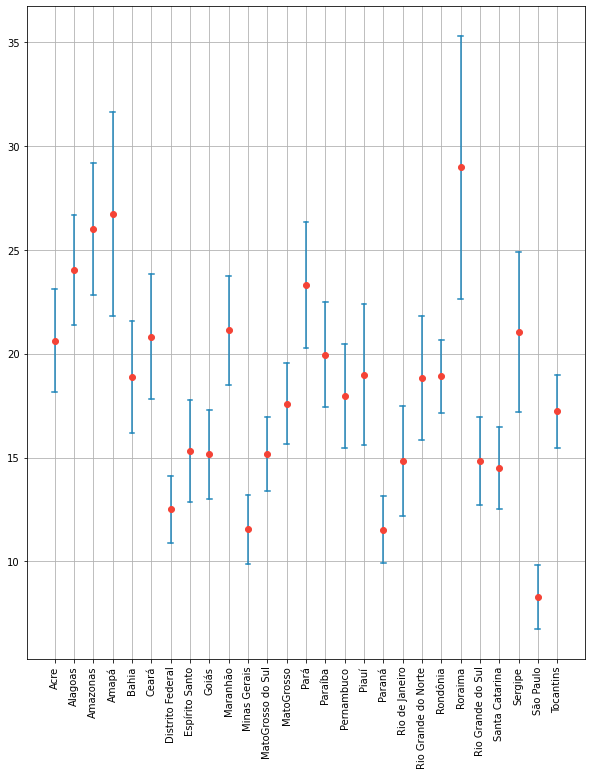

In [ ]:
plt.figure(figsize=(10,12))
plt.grid()
i = 1
for state in ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'MatoGrosso do Sul', 'MatoGrosso', 'Pará',
       'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']:

    plot_confidence_interval(x = i,values=delivery_time[delivery_time["State"]==state]["time_taken_for_delivery"])
    i += 1
plt.xticks(list(range(1,28)),['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'MatoGrosso do Sul', 'MatoGrosso', 'Pará',
       'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'])
plt.xticks(rotation = 90)
plt.show()


After purchasing , the average time for approving the order by seller is 0.26 days and median time is 0 , means with in a day.

Average time taken for a carrier to start the delivery is 2 and a half day.
average time taken to complete delivery is 12 days. and median of delivery time is 10 days.

Estimated time delivery average is 23 days.

There is a positive correlation between freight value and delivery time.
long distance deliveries are having highers freight values and also takes more time for delivery.

States São Paulo ,Paraná,Minas Gerais, Distrito Federal ,Santa Catarina and Rio de Janeiro are some of the states having faster delivery time relatively.

Alagoas, Amazonas, Amapá ,Pará and Roraima are some states have very slow delivery time relatively.

Insights and Recommendations :

- We have 99,441 customers of data available. 
- We have 96096 number of Unique Customers ids. 
- 14994 different locations of customers
- Customers are from different 4119 cities and 27 states from Brazil.
- total 99441 customers are there in given data.
- from total 99441 orders , 1107 are shipped ,625 were canceled, 96478 are delivered.

- 68% customers are from southeast Brazil , 14% are from south Brazil and rest are other other regions of Brazil .

- Total 3095 sellers who are from 611 different cities and 23 states in Brazil and from 2246 different areas as per zip-code data.

- São Paulo state has the highest numbers of sellers in country.




Analysis of sales and revenue as per time : 
      
- Time period for which the data is given is 25 months. 

- compare to 2017 , revenue has increased in 2018 by 21%. 

- Average number of order are higher during November month , september and october month average orders are comparatively low , in may and july and august have higher average orders compare to other months.


- Tuesday, monday and wednesdays have relatively higher number of orders.

Increasing trend  :

- there is a increasing trend in orders , trend sustains during 2018. There a slight fall we can observe during october 2017 following with a great hike in november month and again a fall in end of december 2017 and january 2018.
- we can observe the trend of increasing orders with time and also for revenue.

- we can observe there's 815% growth increased in terms of orders and 707% growth increment in terms of revenue in January from 2017 to 2018. 
- growth rate for july and august in 2017 to 2018 is relatively very low!

- 2017-february, 2017-march,2017-november were the highest growing sale month compare to its previous month.

Customer_purchasing Behavior: 

- customers are purchasing during moring 8am to late evening 11pm.
- afternoon and evening orders are very high  , compare to morning , and night time.

Product Category : 

- In products Data , total 32951 different products available in Target with 73 different product_category.


- health and beauty, Watches present, bed table bath, sport leisure, computer accessories, Furniture Decoration, housewares, Automotive are some of the top selling product categories.
- health and beauty products are top selling having highest orders.
- PCs and Musical Instruments category have relatively less number of products , but contributes in a high revenue.


- PCs,house pastals oven and cafe,agro industry and commerce,musical instruments,Kitchen portable and food coach are having highest average product price categories.


- 61% orders are between price range 10-100. 33% are from 101-500 price range.


- PCs/electronics, Furniture products,Kitchen Service Area Dinner and Garden equipments, Industry Commerce and Business , agro indsustrial commercial products,Bags Accessories, musical instruments, Construction Tools Illumination are some product categories having high average freighter value.

Delivery time : 


- avg_estimated_delivery_time and delivery_time have a positive correlation with avg_freight_value.


- after purchasing , the average time for approving the order by seller is 0.26 days and median time is 0 , means with in a day.
- average time taken for a carrier to start the delivery is 2 and a half day.
- average time taken to complete delivery is 12 days. and median of delivery time is 10 days.


- estimated time delivery average is 23 days.
- There is a positive correlation between freight value and delivery time.

- states São Paulo ,Paraná, Minas Gerais, Distrito Federal ,Santa Catarina and Rio de Janeiro are some of the states having faster delivery time relatively.
- Alagoas, Amazonas, Amapá ,Pará and Roraima are some states have very slow delivery time relatively.


Region and State vise Analysis : 


- São Paulo ,Rio de Janeiro , Minas Gerais ,Rio Grande do Sul and Paraná are top 5 highest orders states and also generating highest revenue.
- more than 80% of orders are coming from south, southeast and nothest Brazil. 90% of the revenue is coming from south, southeast and nothest Brazil .

Recommendations :

- from the distribution and statistical analysis we can observe the average time to complete the delivery is 12 days . which should be reduced to atleast half , as due to high competition in e-commerce market , its is vital to do so.
- In order to reduce the delivery time, if we look at the average time for carrier to start the delivery itself takes atleast 2 and a half days. and order approaval  time is 0.26 days . These two should be optimized at as low as possible, that can result into delivering faster. 
- If we look at Top states where delivery is really slow compared to estimated date , they are all from north Brazil region. Delivering faster in the north states may create and increase new customers and revenue from north.
- Increasing network in north brazil , having small towns can help increase the customer base. As north Brazil has the worlds largest river and most extesive rain forest, must be a good travel destination, introducing necessary survival/ camping/adventure products can help increase revenue and order from northen region . 
- top selling items are between 10-100 dollars,introducing new different more products from top selling categories can increase revenue more.
- It was observed an increasing trend in revenue and orders over time , yet during october and january sales are decreasing probably after Festival Sales. Introducing possible discount on not so running product can help sell more products during those low going months.